<a href="https://colab.research.google.com/github/Ravindra1972/Anaytics-in-finance-using-Python/blob/main/Visualizing_Financial_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
df = yf.download("MSFT",
start="2020-01-01",
end="2023-11-30",
auto_adjust=False,
progress=False)
df["simple_rtn"] = df["Adj Close"].pct_change()
df = df.dropna()

<Axes: title={'center': 'MSFT stock in 2023'}, xlabel='Date'>

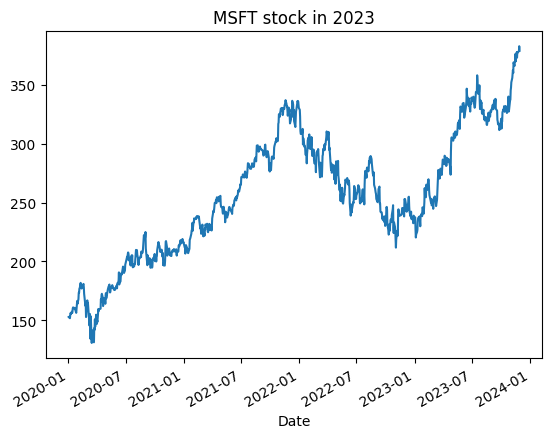

In [4]:
df["Adj Close"].plot(title="MSFT stock in 2023")

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

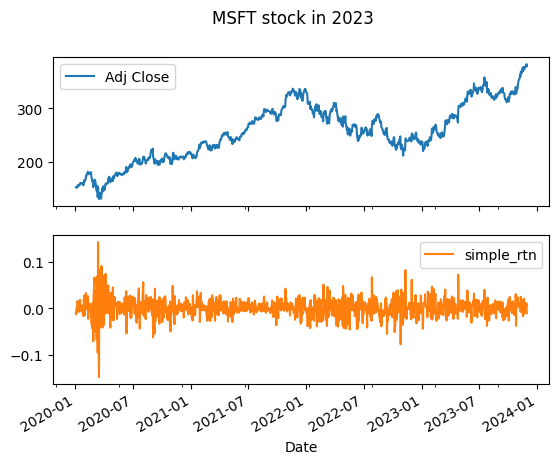

In [5]:
(
df[["Adj Close", "simple_rtn"]]
.plot(subplots=True, sharex=True,
title="MSFT stock in 2023")
)

<Axes: title={'center': 'MSFT stock in 2023'}, xlabel='Date'>

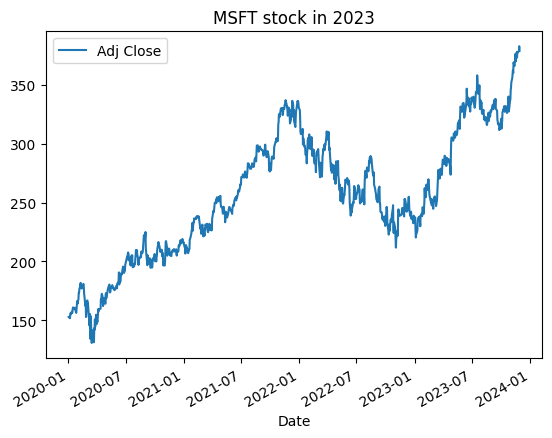

In [6]:
df.plot.line(y="Adj Close", title="MSFT stock in 2023")

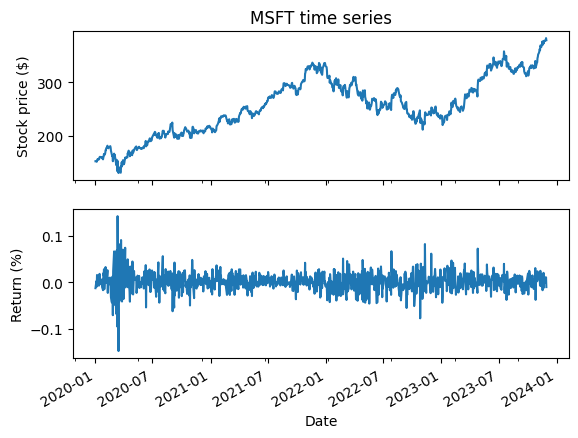

In [10]:
fig, ax = plt.subplots(2, 1, sharex=True)
df["Adj Close"].plot(ax=ax[0])
ax[0].set(title="MSFT time series",
ylabel="Stock price ($)")
df["simple_rtn"].plot(ax=ax[1])
ax[1].set(ylabel="Return (%)")
plt.show()

In [11]:
df["Adj Close"].plot(title="MSFT stock in 2023", backend="plotly")

In [13]:
pip install nasdaq-data-link

In [14]:
#Visualizing seasonal patterns
import pandas as pd
import nasdaqdatalink
import seaborn as sns

In [15]:
nasdaqdatalink.ApiConfig.api_key = "vM44H1PxTrE3_fHBuFg_"

<Axes: title={'center': 'Unemployment rate in years 2014-2023'}, xlabel='Date'>

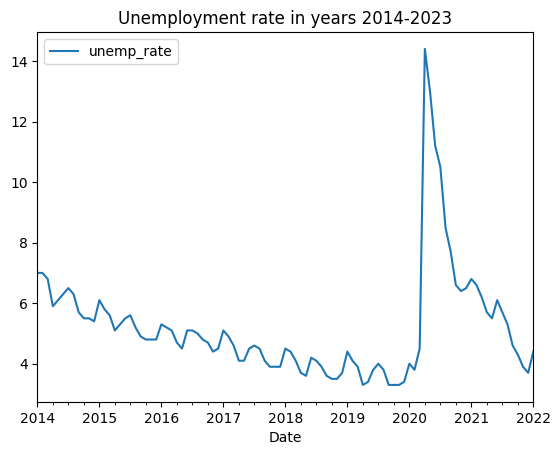

In [16]:
#Download and display unemployment data from Nasdaq Data Link:
df = (
nasdaqdatalink.get(dataset="FRED/UNRATENSA",
start_date="2014-01-01",
end_date="2023-11-30")
.rename(columns={"Value": "unemp_rate"})
)
df.plot(title="Unemployment rate in years 2014-2023")

In [17]:
#Create new columns with year and month:
df["year"] = df.index.year
df["month"] = df.index.strftime("%b")

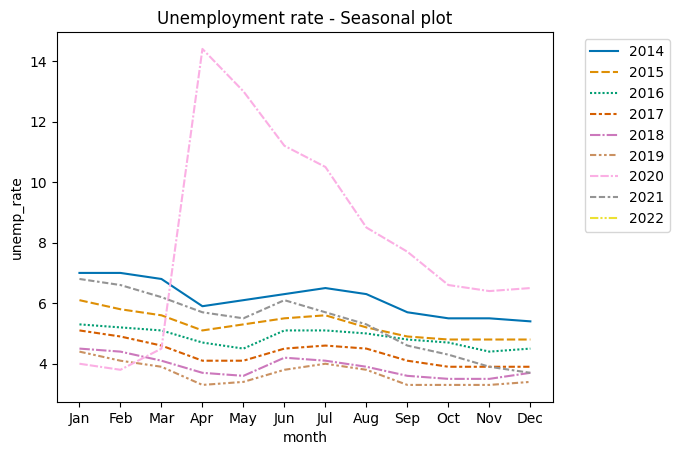

In [18]:
#Create the seasonal plot
sns.lineplot(data=df,
x="month",
y="unemp_rate",
hue="year",
style="year",
legend="full",
palette="colorblind")
plt.title("Unemployment rate - Seasonal plot")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)